## Procesamiento y extracción de características de una señal ECG utilizando libreria biosignals

#### Importación de librerias

In [48]:
import biosignalsnotebooks as bsnb
import numpy as np
import matplotlib.pyplot as plt
import scipy


#### Importación de la señal

In [49]:
SenalECG = np.genfromtxt("Signals/ECG_Reposo_Sujeto1.txt", delimiter = "\t", skip_header = 3)
Fs = 1000
ECG = SenalECG[:,5]
t = bsnb.generate_time(ECG, Fs)


#### Preprocesamiento y visualización

In [50]:
from numpy import array, mean, average, std, sum, sqrt, where, argmax
from numpy.random import normal

bits = 10 # Bits de la salida 
volt_range = 3

ecg_signal = (ECG * volt_range/(2**bits - 1))
# ecg_signal = ECG * ((Fs/2**10) - (1/2) * 3.3) / # 1100 Funcion de transferenica
ecg_signal = ecg_signal -np.mean(ecg_signal)

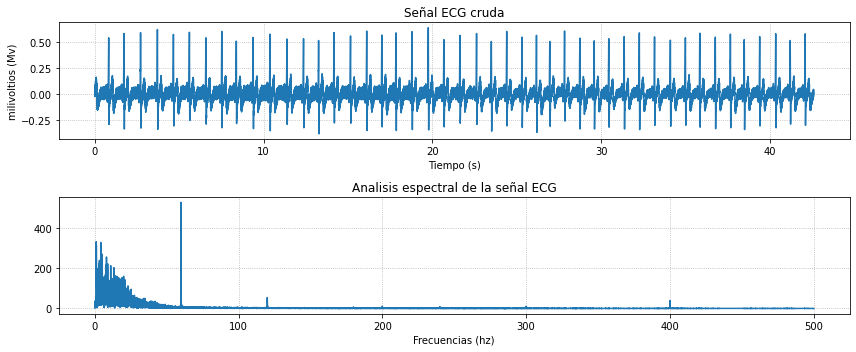

In [51]:
#Transformada de Fourier
freq_axis_1, power_spect_1 = bsnb.plotfft(ecg_signal, Fs)

#Visualización de la señal
plt.figure(figsize=(12,5))
plt.subplot(211)
plt.subplots_adjust(hspace=0.6, wspace=0.6)
plt.plot(t,ecg_signal)
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("milivoltios (Mv)")
plt.title("Señal ECG cruda")    # graficamos la señal

#Respuesta en frecuecnia
plt.subplot(212)
plt.grid(linestyle=":")
plt.title("Analisis espectral de la señal ECG")
plt.xlabel("Frecuencias (hz)")
plt.plot(freq_axis_1, power_spect_1)
plt.tight_layout()
fig = plt.gcf()
fig.set_facecolor('white')
#plt.savefig('EMGyFFT_crudo.png', transparent=False, )
plt.show()

In [52]:
bsnb.plot([t], [ecg_signal], legend_label=["Raw data"], y_axis_label=["Mv"], x_axis_label="Time (s)")

#### Filtrado

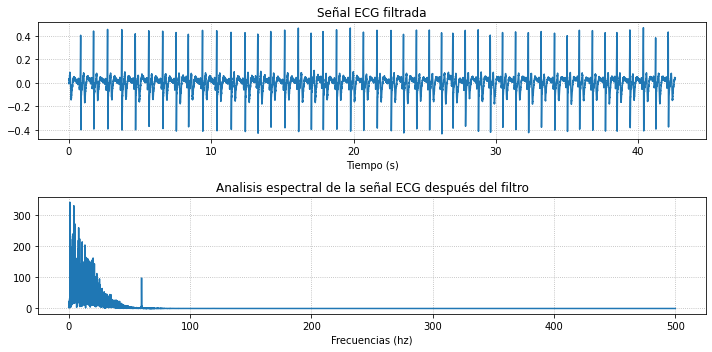

In [53]:
# Digital bandpass filtering with a cutoff frequency f of 0.5-40 Hz
ecgfilter_signal = bsnb.bandpass(ecg_signal, f1=0.5,f2=40, order=4, fs=Fs)

#FFT después del filtrado
freq_axis_2, power_spect_2 = bsnb.plotfft(ecgfilter_signal, Fs)

#Visualización señal filtrada
plt.figure(figsize=(10,5))
plt.subplot(211)
plt.subplots_adjust(hspace=0.6, wspace=0.6)
plt.plot(t,ecgfilter_signal) # graficamos la señal filtrada
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.title("Señal ECG filtrada")

#Visualizacion de la respuesta en frecuencia después del filtro
plt.subplot(212)
plt.grid(linestyle=":")
plt.title("Analisis espectral de la señal ECG después del filtro")
plt.xlabel("Frecuencias (hz)")
plt.plot(freq_axis_2, power_spect_2)
plt.tight_layout()
fig = plt.gcf()
fig.set_facecolor('white')
#plt.savefig('EMGyFFT_filtrada.png', transparent=False, )